In [1]:
using Plots
using LinearAlgebra
using CausalSets
using Base: searchsortedfirst, searchsortedlast
using JLD2
include("spacetime_quasicrystals.jl");

In [16]:
small_set = quasicrystal(1.);

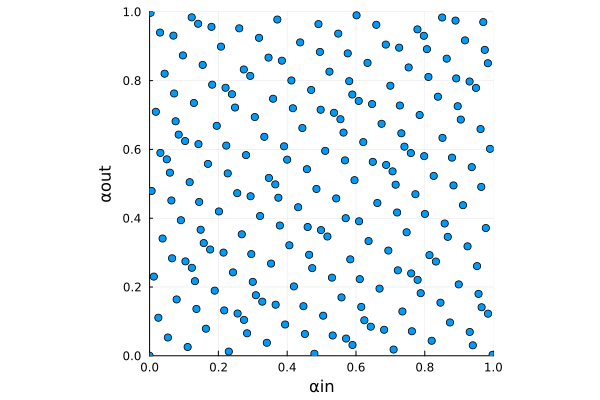

In [28]:
scatter(
    small_set[1],
    small_set[2],
    aspect_ratio = :equal,
    xlabel = "αin",
    ylabel = "αout",
    xlim = (0, 1.),
    ylim = (0, 1.),
    legend = false,
)

In [19]:
f = jldopen("/Users/fabianwagner/Desktop/git_projects/Causal sets/data/quasicrystals/spacetime_quasicrystal_1e8.jld2", "r")
big_set = f["big_set"]
close(f)

In [20]:
center = (0.5, 0.1)

translated_cset = translate_sub_spacetime_crystal(
    100,
    center;
    crystal = big_set,
);

In [21]:
cartesian_points = Vector{CausalSets.Coordinates{2}}([
        ((αin + αout)/2, (αout - αin)/2) for (αin, αout) in translated_cset
    ]);

In [22]:
αin₀, αout₀ = center

αin_vals = first.(translated_cset)
αout_vals = last.(translated_cset)

halfℓ = maximum((maximum(abs.(αin₀ .- αin_vals)), maximum(abs.(αout₀ .- αout_vals))));

In [23]:
t0 = (αin₀ + αout₀)/2
x0 = (αout₀ - αin₀)/2

# extract points
t = first.(cartesian_points)
x = last.(cartesian_points);

In [24]:
tinit, xinit = (t0 - halfℓ, x0)

tt = range(tinit, tinit + halfℓ; length=400)
# null generators from the past tip (xinit, tinit)
x_null_right = xinit .+ (tt .- tinit)
x_null_left  = xinit .- (tt .- tinit);

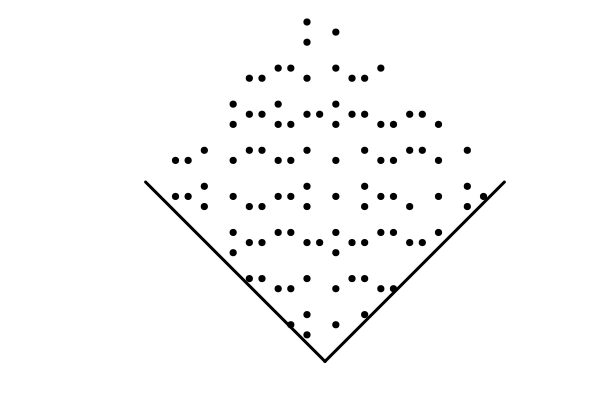

In [25]:
scatter(x, t;
    aspect_ratio = :equal,
    color = :black,
    xlabel = "",
    ylabel = "",
    label = nothing,
    framestyle = :none,   # removes axes box and ticks
    grid = false          # removes background grid
)

plot!(x_null_right, tt;
      color = :black,
      linewidth = 3,
      legend = false
)

plot!(x_null_left, tt;
      color = :black,
      linewidth = 3,
      legend = false
)